In [48]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [49]:
#load the students performance dataset

df = pd.read_csv(r'C:\Users\gthatava\OneDrive - Capgemini\Desktop\PYTHON\1.SWITCHUP\MLOPS\mlproject\notebook\data\StudentsPerformance.csv')
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [50]:
#split X,y

X =df.drop(columns=('math score'),axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [51]:
y =df[['math score']]
y

,math score
0,72
1,69
2,90
3,47
4,76
...,...
995,88
996,62
997,59
998,68


In [52]:
# show list of categorical and numerical columns

cat_col = [col for col in df.columns if df[col].dtype=='O']
num_col = [col for col in df.columns if df[col].dtype!='O']
print(cat_col)
print(num_col)

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
['math score', 'reading score', 'writing score']


In [53]:
# print individual categories in each categorical columns

for col in cat_col:
    print(f'The categories in {col} column are : ',end=" ")
    print(df[col].unique())



The categories in gender column are :  ['female' 'male']
The categories in race/ethnicity column are :  ['group B' 'group C' 'group A' 'group D' 'group E']
The categories in parental level of education column are :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The categories in lunch column are :  ['standard' 'free/reduced']
The categories in test preparation course column are :  ['none' 'completed']


In [54]:
num_col.remove('math score')

In [55]:
# one hot encoding on categorical columns and standardscler on numerical columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder()
scaler = StandardScaler()

transformer = ColumnTransformer(
    [('Encoder',ohe,cat_col),
     ('scaler',scaler,num_col),
     ]
)

In [56]:
X.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
5,female,group B,associate's degree,standard,none,83,78
6,female,group B,some college,standard,completed,95,92
7,male,group B,some college,free/reduced,none,43,39
8,male,group D,high school,free/reduced,completed,64,67
9,female,group B,high school,free/reduced,none,60,50


In [57]:
# apply column transformer on X column

X=transformer.fit_transform(X)


In [58]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [59]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1000, 19)
(750, 19)
(250, 19)


In [60]:
#build a function for evaluation metrics

def evaluate_model(y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)

    return mse,mae,r2

In [70]:
# now fit all the models 

models = {
    'LinearRegression':LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'catboost' : CatBoostRegressor(verbose=False),
    'xgb' : XGBRegressor(),
    'knn' : KNeighborsRegressor(),
    'DTR' : DecisionTreeRegressor(),
    'RFR' : RandomForestRegressor(),
    'ADBR' : AdaBoostRegressor(),
    'SVR' : SVR(),
    
 }

model_list =[]
r2_values =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    model_train_mse , model_train_mae, model_train_r2 = evaluate_model(y_train,y_pred_train)
    model_test_mse , model_test_mae, model_test_r2 = evaluate_model(y_test,y_pred_test)    

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_values.append(model_test_r2)
    
    print('='*35)
    print('\n')

LinearRegression
Model performance for Training set
- Mean Squared Error: 28.0608
- Mean Absolute Error: 4.2383
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Mean Squared Error: 30.0581
- Mean Absolute Error: 4.3379
- R2 Score: 0.8778


Lasso
Model performance for Training set
- Mean Squared Error: 42.9223
- Mean Absolute Error: 5.1837
- R2 Score: 0.8077
----------------------------------
Model performance for Test set
- Mean Squared Error: 44.2775
- Mean Absolute Error: 5.2217
- R2 Score: 0.8200


Ridge
Model performance for Training set
- Mean Squared Error: 28.0642
- Mean Absolute Error: 4.2368
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Mean Squared Error: 30.0173
- Mean Absolute Error: 4.3354
- R2 Score: 0.8780


catboost
Model performance for Training set
- Mean Squared Error: 8.6697
- Mean Absolute Error: 2.3221
- R2 Score: 0.9612
----------------------------------
Model performance for Test set


c:\Users\gthatava\OneDrive - Capgemini\Desktop\PYTHON\1.SWITCHUP\MLOPS\mlproject\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RFR
Model performance for Training set
- Mean Squared Error: 5.3646
- Mean Absolute Error: 1.8316
- R2 Score: 0.9760
----------------------------------
Model performance for Test set
- Mean Squared Error: 37.2210
- Mean Absolute Error: 4.7682
- R2 Score: 0.8487


ADBR
Model performance for Training set
- Mean Squared Error: 33.2480
- Mean Absolute Error: 4.7157
- R2 Score: 0.8510
----------------------------------
Model performance for Test set
- Mean Squared Error: 37.4460
- Mean Absolute Error: 4.7560
- R2 Score: 0.8478




c:\Users\gthatava\OneDrive - Capgemini\Desktop\PYTHON\1.SWITCHUP\MLOPS\mlproject\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gthatava\OneDrive - Capgemini\Desktop\PYTHON\1.SWITCHUP\MLOPS\mlproject\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR
Model performance for Training set
- Mean Squared Error: 44.4268
- Mean Absolute Error: 4.9127
- R2 Score: 0.8009
----------------------------------
Model performance for Test set
- Mean Squared Error: 67.9661
- Mean Absolute Error: 5.6024
- R2 Score: 0.7237




In [73]:
pd.DataFrame(list(zip(model_list, r2_values)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.877990
0,LinearRegression,0.877824
3,catboost,0.854830
7,RFR,0.848710
8,ADBR,0.847795
4,xgb,0.836290
1,Lasso,0.820027
5,knn,0.793207
6,DTR,0.747959
9,SVR,0.723742


In [74]:
# fit a linear regression model

reg = LinearRegression()

reg.fit(X_train,y_train)
pred=reg.predict(X_test)

r2 = r2_score(y_test,pred)

print(r2)

0.8778243107659014


Text(0, 0.5, 'Predicted')

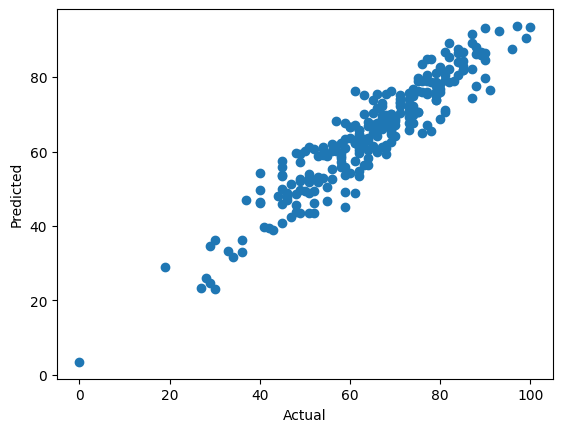

In [81]:
#plot scteerlplot between y_test and y_pred for linear regression model

plt.scatter(y_test,pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

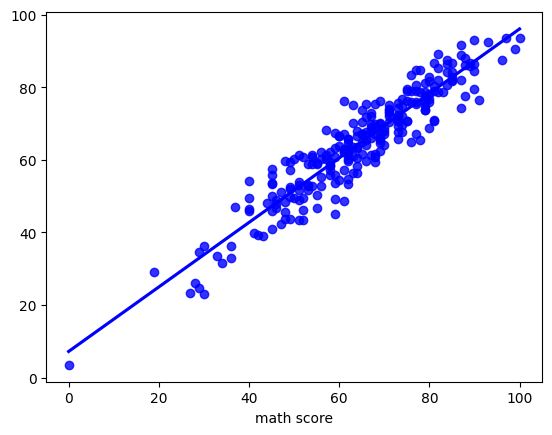

In [83]:
sns.regplot(x=y_test,y=pred,ci=None,color ='blue')

In [84]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':pred,'Difference':y_test-pred})
pred_df

ValueError: Per-column arrays must each be 1-dimensional